<a href="https://colab.research.google.com/github/J-oyin/Dr.-Jimoh-Analysis/blob/main/GDNF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, shapiro, levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [19]:
df = pd.read_excel("/content/Dr.J_GDNF.xlsx")

df.head()


,S/N,Group,GDNF_level,Subject
0,1,Healthy,64.992,RC1
1,2,Healthy,55.094,RC2
2,3,Healthy,51.911,RC3
3,4,Healthy,46.740,RC4
4,5,Healthy,45.726,RC5


In [20]:
print(df['Group'].unique())
print(df['Group'].value_counts())


['Healthy' 'Resilient' 'S/DW' 'S/Esc' 'S/RG108' 'S/LASA' 'S/LASA+Esc'
 'S/HASA' 'S/HASA+Esc']
Group
Healthy       5
Resilient     5
S/DW          5
S/Esc         5
S/RG108       5
S/LASA        5
S/LASA+Esc    5
S/HASA        5
S/HASA+Esc    5
Name: count, dtype: int64


In [21]:
for grp, sub in df.groupby('Group'):
    stat, p = shapiro(sub['GDNF_level'])
    print(f"{grp}: Shapiro p = {p:.4f}")


Healthy: Shapiro p = 0.4670
Resilient: Shapiro p = 0.4178
S/DW: Shapiro p = 0.2334
S/Esc: Shapiro p = 0.8564
S/HASA: Shapiro p = 0.1767
S/HASA+Esc: Shapiro p = 0.8301
S/LASA: Shapiro p = 0.0067
S/LASA+Esc: Shapiro p = 0.1561
S/RG108: Shapiro p = 0.8840


In [22]:
groups = [sub['GDNF_level'].values for _, sub in df.groupby('Group')]
stat, p = levene(*groups)
print(f"Levene test p = {p:.4f}")


Levene test p = 0.3443


In [23]:
from scipy.stats import kruskal

groups = [sub['GDNF_level'].values for _, sub in df.groupby('Group')]


In [24]:
H, p = kruskal(*groups)
print(f"Kruskal–Wallis H = {H:.3f}, p = {p:.4e}")


Kruskal–Wallis H = 36.148, p = 1.6498e-05


In [25]:
pip install scikit-posthocs


In [26]:
import scikit_posthocs as sp

dunn = sp.posthoc_dunn(
    df,
    val_col='GDNF_level',
    group_col='Group',
    p_adjust='fdr_bh'
)

print(dunn)


             Healthy  Resilient      S/DW     S/Esc    S/HASA  S/HASA+Esc  \
Healthy     1.000000   0.597557  0.322228  0.316444  0.032280    0.130783   
Resilient   0.597557   1.000000  0.130783  0.122549  0.109277    0.322353   
S/DW        0.322228   0.130783  1.000000  0.979184  0.000949    0.011337   
S/Esc       0.316444   0.122549  0.979184  1.000000  0.000949    0.011078   
S/HASA      0.032280   0.109277  0.000949  0.000949  1.000000    0.513289   
S/HASA+Esc  0.130783   0.322353  0.011337  0.011078  0.513289    1.000000   
S/LASA      0.342873   0.668721  0.049651  0.045882  0.227926    0.572848   
S/LASA+Esc  0.032280   0.120633  0.000949  0.000949  0.979184    0.547269   
S/RG108     0.980784   0.597557  0.322228  0.316444  0.032280    0.130783   

              S/LASA  S/LASA+Esc   S/RG108  
Healthy     0.342873    0.032280  0.980784  
Resilient   0.668721    0.120633  0.597557  
S/DW        0.049651    0.000949  0.322228  
S/Esc       0.045882    0.000949  0.316444  
S/HA

/tmp/ipython-input-1646540667.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Group', y='GDNF_level', palette='Set2')


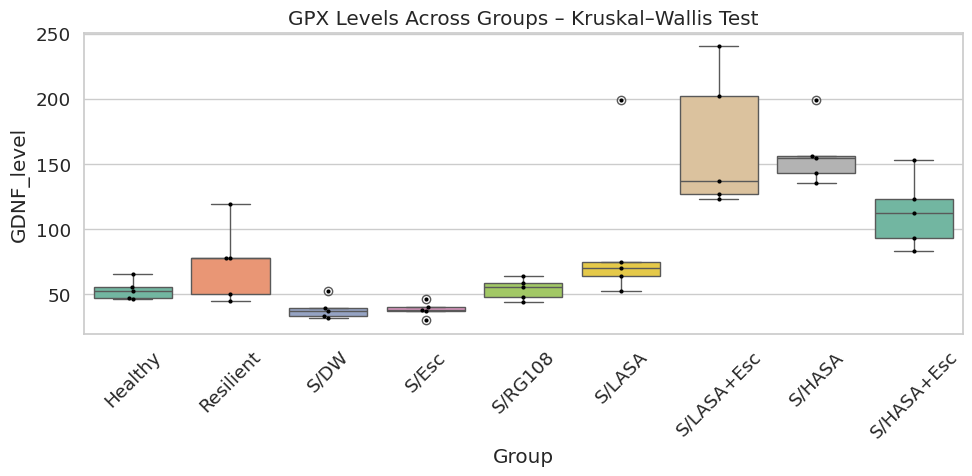

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Group', y='GDNF_level', palette='Set2')
sns.swarmplot(data=df, x='Group', y='GDNF_level', color='black', size=3)

plt.title("GPX Levels Across Groups – Kruskal–Wallis Test")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

summary_plot = (
    df.groupby('Group')['GDNF_level']
      .agg(mean='mean',
           sem=lambda x: x.std(ddof=1)/np.sqrt(len(x)))
      .reset_index()
)


In [29]:
# Convert Dunn matrix to long format
sig_pairs = []
for g1 in dunn.index:
    for g2 in dunn.columns:
        if g1 != g2:
            p = dunn.loc[g1, g2]
            if p < 0.05:    # Significant
                sig_pairs.append((g1, g2, p))

print("\nSignificant comparisons:", sig_pairs)



Significant comparisons: [('Healthy', 'S/HASA', np.float64(0.03228022529338042)), ('Healthy', 'S/LASA+Esc', np.float64(0.03228022529338042)), ('S/DW', 'S/HASA', np.float64(0.0009485318934725811)), ('S/DW', 'S/HASA+Esc', np.float64(0.011336678445845303)), ('S/DW', 'S/LASA', np.float64(0.04965111938745117)), ('S/DW', 'S/LASA+Esc', np.float64(0.0009485318934725811)), ('S/Esc', 'S/HASA', np.float64(0.0009485318934725811)), ('S/Esc', 'S/HASA+Esc', np.float64(0.011078191472943246)), ('S/Esc', 'S/LASA', np.float64(0.045882212937180054)), ('S/Esc', 'S/LASA+Esc', np.float64(0.0009485318934725811)), ('S/HASA', 'Healthy', np.float64(0.03228022529338042)), ('S/HASA', 'S/DW', np.float64(0.0009485318934725811)), ('S/HASA', 'S/Esc', np.float64(0.0009485318934725811)), ('S/HASA', 'S/RG108', np.float64(0.03228022529338042)), ('S/HASA+Esc', 'S/DW', np.float64(0.011336678445845303)), ('S/HASA+Esc', 'S/Esc', np.float64(0.011078191472943246)), ('S/LASA', 'S/DW', np.float64(0.04965111938745117)), ('S/LASA'

In [30]:
def p_to_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'


/tmp/ipython-input-313565295.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


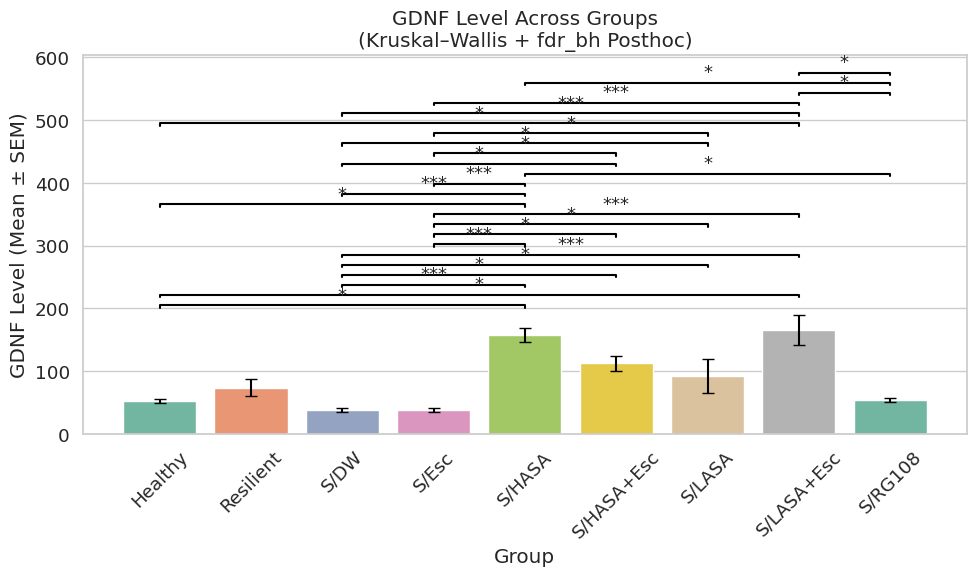

In [37]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid", font_scale=1.2)

ax = sns.barplot(
    data=summary_plot,
    x='Group',
    y='mean',
    errorbar=None,
    palette='Set2'
)

# Add SEM error bars
for i, row in summary_plot.iterrows():
    ax.errorbar(i, row['mean'], yerr=row['sem'], fmt='none',
                ecolor='black', capsize=4)

    # Add stars for Dunn-significant pairs
y_max = summary_plot['mean'].max() + summary_plot['sem'].max() + 0.05*summary_plot['mean'].max()
height_step = 0.08 * y_max
current_height = y_max

for (g1, g2, p) in sig_pairs:
    x1 = summary_plot.index[summary_plot['Group'] == g1][0]
    x2 = summary_plot.index[summary_plot['Group'] == g2][0]

    stars = p_to_stars(p)

    # Draw connecting bracket
    ax.plot([x1, x1, x2, x2],
            [current_height, current_height + 0.02*y_max,
             current_height + 0.02*y_max, current_height],
            c='black')

    # Add stars
    ax.text((x1+x2)/2,
            current_height + 0.03*y_max,
            stars,
            ha='center', va='bottom',
            fontsize=13)

    current_height += height_step  # Stack next annotation above

plt.ylabel("GDNF Level (Mean ± SEM)")
plt.title("GDNF Level Across Groups\n(Kruskal–Wallis + fdr_bh Posthoc)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
import scikit_posthocs as sp

# ───────────────────────────────
# 1. SUMMARY STATISTICS
# ───────────────────────────────
summary = (
    df.groupby('Group')['GDNF_level']
      .agg(
          N='count',
          Median='median',
          Q1=lambda x: np.percentile(x, 25),
          Q3=lambda x: np.percentile(x, 75),
          Mean='mean',
          SD='std'
      )
      .reset_index()
)

summary['IQR'] = summary['Q3'] - summary['Q1']

print("\n=== SUMMARY TABLE (PER GROUP) ===")
print(summary)


# ───────────────────────────────
# 2. KRUSKAL–WALLIS
# ───────────────────────────────
group_arrays = [vals['GDNF_level'].values for _, vals in df.groupby('Group')]

H, p_kw = kruskal(*group_arrays)

kw_table = pd.DataFrame({
    'H_statistic': [H],
    'p_value': [p_kw]
})

print("\n=== KRUSKAL–WALLIS RESULT ===")
print(kw_table)


# ───────────────────────────────
# 3. DUNN POSTHOC TEST (Holm corrected)
# ───────────────────────────────
dunn = sp.posthoc_dunn(df, val_col='GDNF_level', group_col='Group', p_adjust='holm')

print("\n=== DUNN POSTHOC (fdr_bh-corrected) ===")
print(dunn)


# ───────────────────────────────
# 4. MANUSCRIPT-READY TABLE COMBINED
# ───────────────────────────────
manuscript_table = {
    "Summary": summary,
    "Kruskal_Wallis": kw_table,
    "Dunn_Posthoc": dunn
}

print("\n\n==== MANUSCRIPT READY TABLES GENERATED ====")



=== SUMMARY TABLE (PER GROUP) ===
        Group  N   Median       Q1       Q3      Mean         SD     IQR
0     Healthy  5   51.911   46.740   55.094   52.8926   7.768845   8.354
1   Resilient  5   77.763   49.822   77.763   73.7610  29.458988  27.941
2        S/DW  5   36.927   33.210   38.831   38.4556   8.075228   5.621
3       S/Esc  5   37.875   36.927   39.794   37.9884   5.794398   2.867
4      S/HASA  5  154.297  142.602  155.779  157.4296  24.730568  13.177
5  S/HASA+Esc  5  111.983   92.489  122.848  112.5444  27.516212  30.359
6      S/LASA  5   69.552   63.867   74.209   91.7136  60.567778  10.342
7  S/LASA+Esc  5  136.864  127.002  202.244  165.8604  52.612750  75.242
8     S/RG108  5   55.094   47.760   58.336   53.7554   8.088144  10.576

=== KRUSKAL–WALLIS RESULT ===
   H_statistic   p_value
0    36.147933  0.000016

=== DUNN POSTHOC (fdr_bh-corrected) ===
             Healthy  Resilient      S/DW     S/Esc    S/HASA  S/HASA+Esc  \
Healthy     1.000000    1.00000  1.0

In [33]:
with pd.ExcelWriter("GPX_KW_Analysis.xlsx") as writer:
    summary.to_excel(writer, sheet_name="Summary", index=False)
    kw_table.to_excel(writer, sheet_name="Kruskal", index=False)
    dunn.to_excel(writer, sheet_name="Dunn_Posthoc")
